In [1]:
%load_ext autoreload
%autoreload 2
import miniGPT
import torch
import numpy as np
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
text, data, vocab_size, tokenizer = miniGPT.data_utils.get_shakespeare_data()
data = data.to(device,torch.long)

Model Numbers : 
   Context   :  512 tokens
   Embedding :  384 tokens
   Layers    :    6
   Heads     :    6
   Params    : 8 M


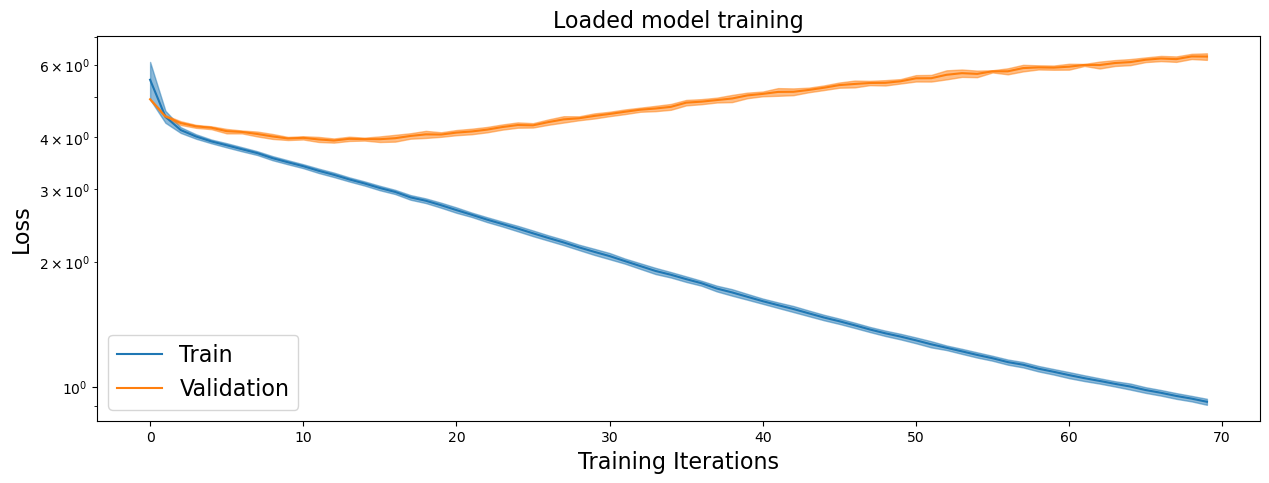

In [48]:
savedir = '/home/tau/emenier/data/GPT/DecoderGPT/BPEShakespeare/'
max_block_size = 512 # what is the maximum context length for predictions?
lr = 3e-4
dtype = torch.float32
n_heads = 6
C = 6*64
n_layer = 6
dropout = 0.2

gpt_model = miniGPT.gpt.DecoderGPT(vocab_size, C, n_layer, n_heads, 
                    max_block_size, dropout_freq=dropout).to(device,dtype)

trainer = miniGPT.train_utils.DecoderGPTtrainer(gpt_model,lr,
                    checkpoint_path=savedir,wd=1e-5)
dic = trainer.load('last_model.trch')
train_dataset = miniGPT.train_utils.TextDataset(
                data[:int(0.9*len(data))],max_block_size)
val_dataset = miniGPT.train_utils.TextDataset(
                data[int(0.9*len(data)):],max_block_size)

miniGPT.plot_utils.model_numbers(gpt_model,max_block_size,n_layer,C, n_heads)
miniGPT.plot_utils.plot_losses(dic)

In [51]:
ix = np.random.choice(len(train_dataset))
gen_length = 75
x,y = train_dataset.data[ix:ix+max_block_size],train_dataset.data[ix:ix+max_block_size+gen_length]
x, y = x.reshape(1,*x.shape), y.reshape(1,*y.shape)
ret = trainer.gpt_model.generate(x,gen_length)
decoded_gen = tokenizer.decode(ret[0,max_block_size:].detach().cpu().numpy())
decoded_truth = tokenizer.decode(y[0,max_block_size-10:max_block_size].detach().cpu().numpy())
decoded_truth_2 = tokenizer.decode(y[0,max_block_size-10:].detach().cpu().numpy())
print(decoded_truth + ' ----- ' + decoded_gen)
print()
print('-------------')
print(decoded_truth_2)
print()

100%|██████████| 75/75 [00:00<00:00, 112.94it/s]

heritance of their loves and safe ----- guard
Whichs
My daily bring forth. When we do, and peace
The lists for Irevery keep some counsel:
Then dlies of, and my head in faith I'll lay down:
Ifer them, if he be as strong, were my mates,
Shall come

-------------
heritance of their loves and safeguard
Of what that want might ruin.

MENENIUS:
Noble lady!
Come, go with us; speak fair: you may salve so,
Not what is dangerous present, but the loss
Of what is past.

VOLUMNIA:
I prithee now, my son,



In [70]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.decoders import ByteLevel as ByteLevelDecoder
from tokenizers.normalizers import Lowercase, NFKC, Sequence
from tokenizers.pre_tokenizers import ByteLevel, Whitespace

tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = ByteLevel()
trainer = BpeTrainer(vocab_size=2048, show_progress=True,special_tokens=["[UNK]"])
tokenizer.decoder = ByteLevelDecoder()

In [71]:
tokenizer.train(['./tinyshakespeare.txt'],trainer=trainer)

In [72]:
output = tokenizer.encode(text[:256])
print(tokenizer.decode(output.ids))

 First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:



In [77]:
print(output.ids)

[491, 872, 9, 64, 13, 42, 369, 149, 400, 1631, 618, 1770, 528, 5, 492, 132, 429, 7, 64, 64, 12, 85, 9, 64, 30, 53, 402, 5, 429, 7, 64, 64, 17, 384, 872, 9, 64, 36, 69, 248, 223, 1848, 593, 1300, 99, 777, 347, 99, 82, 213, 376, 11, 64, 64, 12, 85, 9, 64, 29, 93, 317, 593, 7, 1848, 593, 7, 64, 64, 17, 384, 872, 9, 64, 17, 384, 5, 100, 326, 148, 38, 968, 1173, 141, 704, 538, 1762, 99, 76, 1002, 7, 64, 64, 12, 85, 9, 64]


[autoreload of miniGPT.data_utils failed: Traceback (most recent call last):
  File "/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/tau/emenier/workspace/miniGPT/miniGPT/data_utils.py", line 7
    def tr

In [73]:
tokenizer.get_vocab_size()

2048

In [76]:
tokenizer.save("/home/tau/emenier/data/GPT/Tokenizers/BPETokenizer_shekespeare.json")